In [ ]:
# http://www.amazon.co.jp/ビジネスマンのためのビックデータ解析：-知の集合体・最先端人工知能の活用-武藤佳恭-ebook/dp/B010S214BI

In [1]:
# 全体を通して使いそうなライブラリを読み込み（一部勝手に追加したものあり）
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

In [2]:
# 1章：データからルールを学ぶ

In [3]:
# poker
train = pd.read_csv('../data/poker_train.csv')
test=pd.read_csv('../data/poker_test.csv')

clf=RandomForestClassifier(n_estimators=200, min_samples_split=1, n_jobs=-1)

x = train[['s1','r1','s2','r2','s3','r3','s4','r4','s5','r5']]
y = train['c']

clf.fit(x,y)
print(clf.score(x,y))

x = test[['s1','r1','s2','r2','s3','r3','s4','r4','s5','r5']]
y = test['c']
p = clf.predict(x)
print(clf.score(x,y))

1.0
0.620903


In [ ]:
# 2章：scikit-learn

In [ ]:
# scikit-learnに実装されているアンサンブル学習の分類器

#from sklearn.ensemble import AdaBoostClassifier as clf
#from sklearn.ensemble import AdaBoostRegressor as clf
#from sklearn.ensemble import BaggingClassifier as clf
#from sklearn.ensemble import BaggingRegressor as clf
#from sklearn.ensemble import ExtraTreesClassifier as clf
#from sklearn.ensemble import ExtraTreesRegressor as clf
#from sklearn.ensemble import GradientBoostingClassifier as clf
#from sklearn.ensemble import GradientBoostingRegressor as clf
#from sklearn.ensemble import RandomForestClassifier as clf
#from sklearn.ensemble import RandomTreesEmbedding as clf
#from sklearn.ensemble import RandomForestRegressor as clf

In [ ]:
# 3章：重回帰分析

In [4]:
# ice
data = pd.read_csv('../data/ice.csv')
x = data[['temp','street']]
y = data['ice']

In [5]:
# ice - ランダムフォレスト回帰
clf = RandomForestRegressor(n_estimators=200, min_samples_split=1, n_jobs=-1)
clf.fit(x,y)
print(clf.score(x,y))
print(clf.feature_importances_)

0.866111554968
[ 0.21588898  0.78411102]


In [6]:
# ice - ランダムフォレスト分類器
clf = RandomForestClassifier(n_estimators=200, min_samples_split=1, n_jobs=-1)
clf.fit(x,y)
print(clf.score(x,y))
print(clf.feature_importances_)

0.967741935484
[ 0.38822431  0.61177569]


In [7]:
# ice - extTreeReg
clf = ExtraTreesRegressor()
clf.fit(x,y)
p = clf.predict(x)
print(clf.score(x,y))

0.984509772248


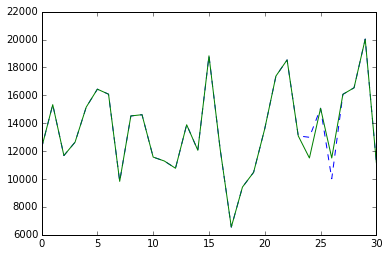

In [8]:
t = np.arange(0.0,31.0)
plt.plot(t, data['ice'], '--', t, p, '-')
plt.show()

0.984509764291


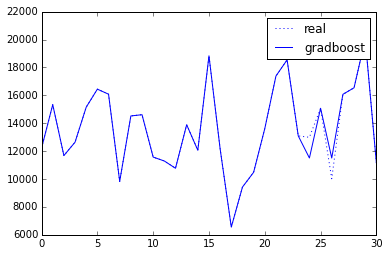

In [9]:
# ice - gradient boost
clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.2,max_depth=1, random_state=0)
clf.fit(x,y)
print(clf.score(x,y))
p = clf.predict(x)
t = np.arange(0.0,31.0)
plt.plot(t,data['ice'],':b')
plt.plot(t,p,'-b')
plt.legend(('real','gradboost'))
plt.show()

In [10]:
# 4章：ビッグデータ解析

In [11]:
data=pd.read_csv('../data/red.csv')
x=data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y=data['quality']

In [12]:
clf=ExtraTreesClassifier(n_estimators=200, max_depth=None,min_samples_split=1, random_state=0)
clf.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=1,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
test=pd.read_csv('../data/red_test.csv')
x=test[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y=test['quality']

0.72
[ 0.07566132  0.09729666  0.08053506  0.07951592  0.07636599  0.07474374
  0.10317544  0.08577335  0.07572032  0.10179249  0.14941971]


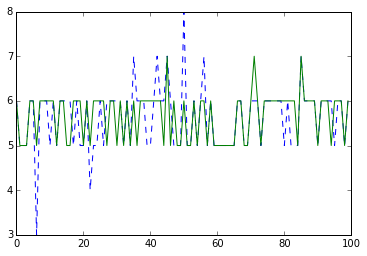

In [14]:
p=clf.predict(x)
print(clf.score(x,y))
print(clf.feature_importances_)
t=np.arange(0.0,100.0)
plt.plot(t,test['quality'],'--',t,p,'-')
plt.show()

In [15]:
# 5章：パラメータチューニング

In [ ]:
data=pd.read_csv('../data/poker_train.csv')
x=data[['s1','r1','s2','r2','s3','r3','s4','r4','s5','r5']]
y=data['c']
clf =RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

param_grid = {
        'n_estimators': [700,750,800],
        'min_samples_split' : [2, 3, 5],
        'max_depth'         : [3, 5, 10, 15, 17],
        'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
print(CV_rfc.best_params_)

test=pd.read_csv('../data/poker_test.csv')
x=test[['s1','r1','s2','r2','s3','r3','s4','r4','s5','r5']]
y=test['c']
p=CV_rfc.predict(x)
print(CV_rfc.score(x,y))